In [1]:
#This is for Know the satellites position with a specific time and date 

In [2]:
#Now I need to know the near 
import os, sys, time, datetime, re, gpstk
from ftplib import FTP
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import math
import geocoder #to get the elevation in a lon-lat point

%matplotlib inline
%run -i pys/utils.py

In [3]:
Sat_Time = "21:20:23"
Sat_Date = "12/03/2017"
#Universidad Industrial de Santander
Longitude_inGround = -73.1224429 
Latitude_inGround = 7.1388027


In [4]:
#Parse String to Date
import datetime

time_sat = datetime.datetime.strptime(Sat_Time,'%H:%M:%S')
date_sat = datetime.datetime.strptime(Sat_Date,'%d/%m/%Y')

InputDate = datetime.datetime.combine(datetime.date(date_sat.year, date_sat.month, date_sat.day), datetime.time(time_sat.hour, time_sat.minute,time_sat.second))
day_of_year = InputDate.timetuple().tm_yday
print InputDate

2017-03-12 21:20:23


In [5]:
UNAVCO_list = pd.read_csv("UNAVCOlist.csv")
UNAVCO_list.columns

Index([u'Unnamed: 0', u'CODE', u'Longitude', u'Latitude'], dtype='object')

search the nearest station

In [6]:
d = compute_distance(UNAVCO_list,Longitude_inGround,Latitude_inGround)
UNAVCO_list['Distance'] = d

In [7]:
UNAVCO_list.sort_values(['Distance'], ascending=[True], inplace=True)
UNAVCO_list

,Unnamed: 0,CODE,Longitude,Latitude,Distance
2632,2632,BUCM,-73.181700,7.116900,6977.043272
2673,2673,BUCM,-73.181700,7.116900,6977.043272
2901,2901,BUCM,-73.181700,7.116900,6977.043272
2690,2690,FLOR,-73.088600,7.041600,11435.389590
2668,2668,ARAT,-73.052200,6.703200,49053.488836
3048,3048,PLON,-72.649000,7.384000,58911.122695
25086,25086,MECE,-73.712000,7.107200,65144.656963
2728,2728,SOCO,-73.241700,6.462500,76345.500651
2871,2871,ABRE,-73.225900,8.086800,106027.388816
24149,24149,CUC1,-72.512800,7.932300,110911.258013


In [8]:
#search the nearest land stage
IDmin = UNAVCO_list.Distance.argmin()
S_Code = UNAVCO_list.CODE[IDmin]
S_Dist = UNAVCO_list.Distance[IDmin]
print S_Code,UNAVCO_list.Longitude[IDmin],UNAVCO_list.Latitude[IDmin],S_Dist

BUCM -73.1817 7.1169 6977.04327191


Now I have the Name of the Lan Station that I need.


In [9]:
UNAVCO_FTP = 'data-out.unavco.org'
NASA_FTP = 'cddis.gsfc.nasa.gov'

try:
    f = FTP(NASA_FTP)
    #f = FTP(UNAVCO_FTP)
    print f
    
except:
    pass
#print "Welcome:", f.getwelcome()
f.login()

#Now I wnat to look the folder that I need.
UNAVCO_FTP_path = '/pub/rinex/nav/' + str(InputDate.year) + '/' + str(day_of_year).zfill(3)
FTP_path ='/pub/gps/data/daily/'+ str(InputDate.year) + '/' + str(day_of_year).zfill(3) + '/' + str(InputDate.year)[2:] + 'n'

#[data-out.unavco.org] --> /pub/rinex/nav/2017/002
#[cddis.gsfc.nasa.gov] --> /pub/gps/data/daily/2017/001/17n --> 
#    FTP_path ='/pub/gps/data/daily/'+ str_year + '/' + str(day_of_year).zfill(3) + '/' + str_year[2:] + 'n'

print "Folder Needed:", f.cwd(FTP_path)
print "Current working directory:", f.pwd()

<ftplib.FTP instance at 0xac94feac>
Folder Needed: 250 Directory successfully changed.
Current working directory: /pub/gps/data/daily/2017/071/17n


In [ ]:
import os, sys
from ftplib import FTP 


LineData = 0
while (1):
    try:
        if(LineData>70):
            break
        IDmin = UNAVCO_list.Distance.argmin()
        NameStation = UNAVCO_list.CODE[IDmin]
        LineData += 1
        NameFile = NameStation.lower() + str(day_of_year).zfill(3) + '0.' + str(InputDate.year)[2:] + 'n.Z' 
        #For Now just GPS constallartion, I mean, .n file.'
        clear_output(wait=True)
        print("Try with station: %s" % (NameFile),"to " + str(float_formatter(UNAVCO_list.Distance[IDmin]/1000)) + " [Km]")
        print
        
        f.voidcmd("TYPE I")
        datasock, size = f.ntransfercmd("RETR "+ NameFile)
        bytes_so_far = 0
        fd = open(NameFile, 'wb')
        
        while 1:
            buf = datasock.recv(2048) 
            
            fd.write(buf)
            bytes_so_far += len(buf)
            clear_output(wait=True)
            print "Received",bytes_so_far, "of %d total bytes (%.1f%%)" % (size, 100 * bytes_so_far / float(size)),"bytes"
            sys.stdout.flush()
            if not buf:
                break
                 
            #if bytes_so_far == len(buf):
                #print 
                #break
        print("File %s" % (NameFile),"to " + str(float_formatter(UNAVCO_list.Distance[IDmin]/1000)) + " [Km]")
        fd.close()
        datasock.close()
        f.voidresp
        f.close()
        break
    except:
        UNAVCO_list = UNAVCO_list[UNAVCO_list.CODE != NameStation]

In [ ]:
#Note: If can't find a file, alert, or if the day is before or equal to today.

In [ ]:
NameFile

In [ ]:
gunzip_some_file(NameFile,'navRINEX',0)

In [ ]:
#!head -29 $navRINEX

Info about coordinate system [here](https://stereo-ssc.nascom.nasa.gov/coordinates_explanation.shtml)

In [10]:
import datetime
PRN = 23
#import ephem

navfile = 'navRINEX'
navHeader, navData = gpstk.readRinex3Nav(navfile)
# setup ephemeris store to look for satellite positions
bcestore = gpstk.GPSEphemerisStore()
contador = 1
 
for navDataObj in navData:
    ephem = navDataObj.toGPSEphemeris()
    bcestore.addEphemeris(ephem)
    if contador == 1:
        print "PRN: ",ephem.satID
        globalEphem = ephem
        POS = future_position(ephem,280850,1937)
        print "GPS time:", ephem.HOWtime
        print 
        contador += 1 
bcestore.SearchNear()
navData.close()

PRN:  GPS 1
GPS time: 604230



In [2]:
import sgp4

In [11]:
Longitude_inGround = -73.1224429 
Latitude_inGround = 7.1388027
AZ,EL = ECEFtoAzElev(POS,Longitude_inGround,Latitude_inGround)
print "Azimuth: ",AZ," Elevation: ",EL

Azimuth:  252.170708552  Elevation:  77.8946620538


In [69]:
import datetime
#PRN = All

Longitude_inGround = -73.1224429 
Latitude_inGround = 7.1388027
WeekSec = UTC2GPS(datetime.datetime.now()) #second of week
print WeekSec
list_PRN = []
AZIMUTH = []
ELEVATION = []

AZIMUTH2 = []
ELEVATION2 = []
Times = []
Diffs = []
Now = []
ownPRN = np.arange(0,32)
prueba = 1
More360 = []
More90 = []

navfile = 'navRINEX'
navHeader, navData = gpstk.readRinex3Nav(navfile)
bcestore = gpstk.GPSEphemerisStore()
 
for navDataObj in navData:
    ephem = navDataObj.toGPSEphemeris()
    #bcestore.addEphemeris(ephem)
    
    if ephem.HOWtime <= WeekSec: # and math.fabs(WeekSec-ephem.HOWtime) <= 21600.:  #21600 is 6 hours in seconds
        #print "SAT: ",ephem.satID," Time: ",ephem.HOWtime, " Diff: ", math.fabs(WeekSec-ephem.HOWtime)
        list_PRN.append(str(ephem.satID))
        Times.append(ephem.HOWtime)
        Diffs.append(math.fabs(WeekSec-ephem.HOWtime))
        
        POS = future_position(ephem,0,1937)
        AZ,EL = ECEFtoAzElev(POS,Longitude_inGround,Latitude_inGround)
        AZIMUTH.append(AZ)
        ELEVATION.append(EL)
        
        Now = future_position(ephem,WeekSec,1937)
        AZ2,EL2 = ECEFtoAzElev(Now,Longitude_inGround,Latitude_inGround)
        AZIMUTH2.append(AZ2)
        ELEVATION2.append(EL2)
        
        More360.append(AZ>360)
        More90.append(EL>90)
        
        if prueba == 1:
            print ephem.satID
            prueba += 1
        
RES = pd.DataFrame({"SATID":list_PRN ,"Time": Times, "Diff":Diffs,"EL": ELEVATION,"AZ": AZIMUTH,
                    "EL_now": ELEVATION2,"AZ_now": AZIMUTH2,"More360": More360,"More90": More90,})
        
bcestore.SearchNear()
navData.close()

RES.sort_index(by=['Time'],ascending=[True])

316879
GPS 10


/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:59: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,AZ,AZ_now,Diff,EL,EL_now,More360,More90,SATID,Time
0,10.301449,10.301449,316879,78.533599,78.533599,False,False,GPS 10,0
1,116.221953,116.221953,316879,76.361421,76.361421,False,False,GPS 32,0
2,339.019888,339.019888,316879,72.654026,72.654026,False,False,GPS 27,0
3,11.416913,11.416913,316879,72.084995,72.084995,False,False,GPS 11,0
4,306.469339,306.469339,316879,27.735630,27.735630,False,False,GPS 8,0
5,41.696545,41.696545,316879,68.219180,68.219180,False,False,GPS 18,0
6,162.761037,162.761037,316879,54.022655,54.022655,False,False,GPS 26,0
7,113.717628,113.717628,316879,61.924043,61.924043,False,False,GPS 16,0
8,185.328143,185.328143,316789,40.173028,40.173028,False,False,GPS 30,90
9,34.518279,34.518279,316489,27.939329,27.939329,False,False,GPS 22,390


In [15]:
seconds = UTC2GPS(datetime.datetime.now())
seconds, len(RES)

(147069, 205)

In [55]:
#specific test
seconds = 147069

In [71]:
#GPS2UTC(1937,seconds)
#Result: datetime.datetime(2017, 2, 3, 15, 1, 16)


In [72]:
sx= []
sy = []
sx2 = []
sy2 = []
names = []


for obs in range (0,len(RES)):
    if RES.Time[obs] == 0: #first review
        sx.append(RES.EL[obs])
        sy.append(RES.AZ[obs])
        
        sx2.append(RES.EL_now)
        sy2.append(RES.AZ_now)
        names.append(RES.SATID[obs])
        print RES.SATID[obs]
        
        
sx3,sy3 = (to_skyplot(sx,sy))
sx4,sy4 = (to_skyplot(sx2,sy2))
        

print len(sx),len(sx3)


GPS 10
GPS 32
GPS 27
GPS 11
GPS 8
GPS 18
GPS 26
GPS 16
8 8


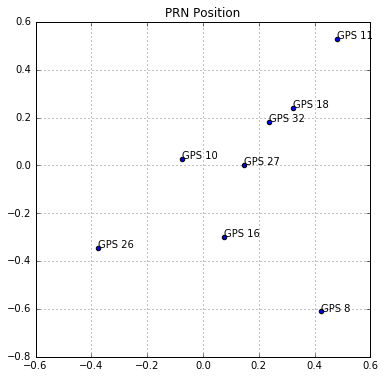

In [67]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML 
%matplotlib inline
fig =plt.figure(figsize=(6,6))


axes = plt.gca()
#axes.set_xlim([-1,1])
#axes.set_ylim([-1,1])
#plt.subplot(111,projection='polar')
plt.scatter(sx3,sy3)
plt.title('PRN Position')
plt.grid()
for i,txt in enumerate(names):
    #print txt,i
    plt.annotate(txt, (sx3[i],sy3[i]))

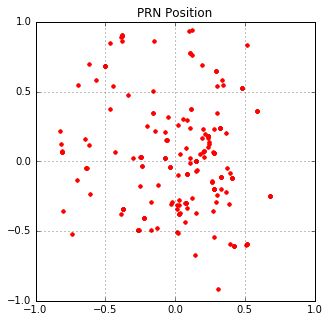

In [65]:
#Plot the last Observation
fig =plt.figure(figsize=(5,5))
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.scatter(sx3,sy3,s=8, alpha=0.5, color = 'blue')
plt.scatter(sx4,sy4,s=8, alpha=0.5, color = 'red')
plt.title('PRN Position')
plt.grid()

In [66]:
print sx3

[-0.07563888  0.23819258  0.14832945  0.47897954  0.42412685  0.32384286
 -0.37658545  0.07440796]


In [ ]:
import datetime
#PRN = All

Longitude_inGround = -73.1224429 
Latitude_inGround = 7.1388027
WeekSec = UTC2GPS(datetime.datetime.now()) #second of week
print WeekSec
list_PRN = []
AZIMUTH = []
ELEVATION = []
Times = []
Diffs = []
ownPRN = np.arange(0,32)
prueba = 1

navfile = 'navRINEX'
navHeader, navData = gpstk.readRinex3Nav(navfile)
bcestore = gpstk.GPSEphemerisStore()
 
for navDataObj in navData:
    ephem = navDataObj.toGPSEphemeris()
    #bcestore.addEphemeris(ephem)
    
    if 1 == 1: #ephem.HOWtime <= WeekSec: # and math.fabs(WeekSec-ephem.HOWtime) <= 21600.:  #21600 is 6 hours in seconds
        #print "SAT: ",ephem.satID," Time: ",ephem.HOWtime, " Diff: ", math.fabs(WeekSec-ephem.HOWtime)
        list_PRN.append(str(ephem.satID))
        Times.append(ephem.HOWtime)
        Diffs.append(math.fabs(WeekSec-ephem.HOWtime))
        POS = future_position(ephem,WeekSec,1937)
        AZ,EL = ECEFtoAzElev(POS,Longitude_inGround,Latitude_inGround)
        AZIMUTH.append(AZ)
        ELEVATION.append(EL)
        if prueba == 1:
            print ephem.satID
            prueba += 1
        
RES = pd.DataFrame({"SATID":list_PRN ,"Time": Times, "Diff":Diffs,"Elev": ELEVATION,"Azimuth": AZIMUTH,})
        
bcestore.SearchNear()
navData.close()